In [13]:
import re

import matplotlib.pyplot as plt
import numpy as np

In [10]:
file = "/home/aiops/chenxw/CURE/result-old.txt"
# file = "/home/aiops/chenxw/verl/results-execute.txt"

In [11]:
code_accs = []
case_accs = []
with open(file, "r") as f:
    lines = f.readlines()
    for line in lines:
        if "case acc:" in line:
            match = re.search(r"case acc:\s*([0-9.]+)", line)
            if match:
                case_acc = float(match.group(1))
                case_accs.append(case_acc)
        if "code acc:" in line:
            match = re.search(r"code acc:\s*([0-9.]+)", line)
            if match:
                code_acc = float(match.group(1))
                code_accs.append(code_acc)
print("Case Acc:", case_accs)
print("Code Acc:", code_accs)

Case Acc: [0.38797169811320753, 0.45754716981132076, 0.47685185185185186, 0.5471938775510204, 0.4784090909090909, 0.61625, 0.6815476190476191, 0.7467105263157895, 0.703125, 0.7772727272727272, 0.7358490566037735, 0.8227272727272728, 0.6864754098360656, 0.7439903846153846, 0.7930555555555555, 0.8394607843137255, 0.8357843137254902, 0.8579545454545454, 0.8175, 0.7352272727272727, 0.8575, 0.8921568627450981, 0.7715909090909091, 0.8534090909090909, 0.7890625, 0.8505434782608695, 0.8045212765957447, 0.8360849056603774, 0.8046875, 0.8343023255813954, 0.8493303571428571]
Code Acc: [0.37375, 0.4175, 0.4075, 0.36375, 0.386875, 0.415625, 0.313125, 0.465, 0.438125, 0.41, 0.396875, 0.421875, 0.436875, 0.398125, 0.349375, 0.404375, 0.37375, 0.41375, 0.375625, 0.42875, 0.399375, 0.4175, 0.431875, 0.435, 0.36, 0.383125, 0.35625, 0.414375, 0.378125, 0.355, 0.441875]


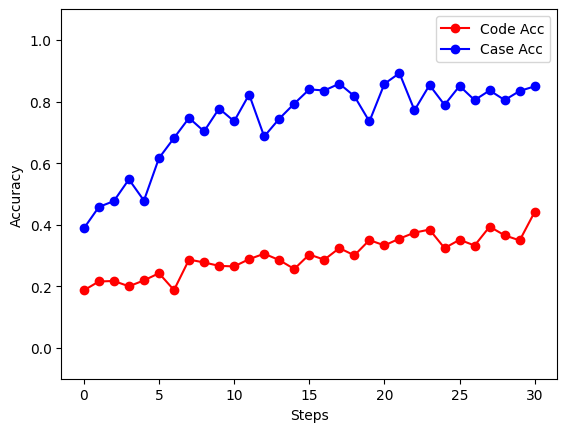

In [20]:
plt.plot(np.array(code_accs)/2*(np.arange(31)+30)/30, marker='o', linestyle='-', color='r', label='Code Acc')
plt.plot(case_accs, marker='o', linestyle='-', color='b', label='Case Acc')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.ylim(-0.1, 1.1)
plt.legend()

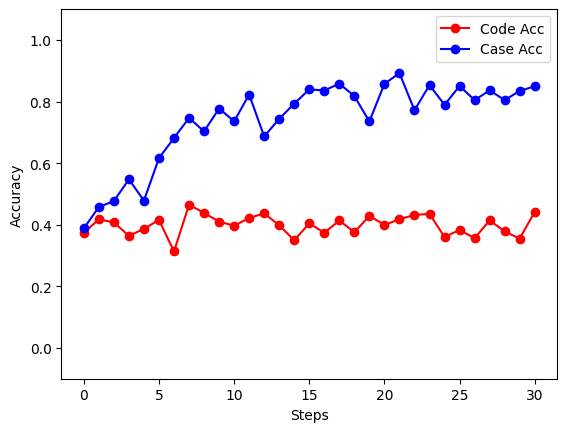

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM

In [2]:
tok = AutoTokenizer.from_pretrained("/home/aiops/chenxw/hfmodels/Qwen3-4B")
model = AutoModelForCausalLM.from_pretrained("/home/aiops/chenxw/hfmodels/Qwen3-4B", torch_dtype="auto")

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

In [3]:
prompt = "Give me a short introduction to large language model."
messages = [
    {"role": "user", "content": prompt}
]
text = tok.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True,
    enable_thinking=True # Switches between thinking and non-thinking modes. Default is True.
)
model_inputs = tok([text], return_tensors="pt").to(model.device)

In [4]:
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=10000
)

In [7]:
text

'<|im_start|>user\nGive me a short introduction to large language model.<|im_end|>\n<|im_start|>assistant\n'

In [5]:
tok.decode(generated_ids[0], skip_special_tokens=True)

"user\nGive me a short introduction to large language model.\nassistant\n<think>\nOkay, the user wants a short introduction to large language models. Let me start by defining what they are. They're AI systems that process and generate human-like text. I should mention their key features, like training on vast data and using deep learning.\n\nI need to highlight their applications: answering questions, writing, coding, etc. Also, mention the scale, like billions of parameters. Maybe touch on their impact on various fields. Keep it concise, avoid jargon. Make sure to explain why they're important. Let me check if I'm covering the main points without getting too technical. Yeah, that should work.\n</think>\n\nLarge language models (LLMs) are advanced artificial intelligence systems designed to understand and generate human-like text. Trained on vast amounts of data, they use deep learning to recognize patterns, context, and meaning in language. These models can perform tasks like answerin

In [8]:
generated_ids

tensor([[151644,    872,    198,  35127,    752,    264,   2805,  16800,    311,
           3460,   4128,   1614,     13, 151645,    198, 151644,  77091,    198,
         151667,    198,  32313,     11,    279,   1196,   6801,    264,   2805,
          16800,    311,   3460,   4128,   4119,     13,   6771,    752,   1191,
            553,  26312,   1128,    807,    525,     13,   2379,   2299,  15235,
           5942,    429,   1882,    323,   6923,   3738,  12681,   1467,     13,
            358,   1265,   6286,    862,   1376,   4419,     11,   1075,   4862,
            389,  12767,    821,    323,   1667,   5538,   6832,    382,     40,
           1184,    311,  11167,    862,   8357,     25,  35764,   4755,     11,
           4378,     11,  10822,     11,   4992,     13,   7281,     11,   6286,
            279,   5452,     11,   1075,  32051,    315,   5029,     13,  10696,
           5796,    389,    862,   5421,    389,   5257,   5043,     13,  13655,
            432,  63594,    

In [ ]:
model_output = model(generated_ids, output_hidden_states=True)  # model forward


In [11]:
model_output.keys()

odict_keys(['logits', 'past_key_values', 'hidden_states'])

In [12]:
type(model)

transformers.models.qwen3.modeling_qwen3.Qwen3ForCausalLM

In [ ]:
output_ids = generated_ids[0][len(model_inputs.input_ids[0]):].tolist() 


In [64]:
raw_prompt= tok.apply_chat_template(messages, add_generation_prompt=True, tokenize=False, enable_thinking=True)
raw_prompt

'<|im_start|>system\n123123<|im_end|>\n<|im_start|>user\nHow are you?<|im_end|>\n<|im_start|>assistant\n'

In [35]:
tok(raw_prompt, return_tensors="pt", add_special_tokens=False)

{'input_ids': tensor([[151644,    872,    198,   4340,    525,    498,     30, 151645,    198,
         151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [36]:
tok(raw_prompt, return_tensors="pt", add_special_tokens=True)

{'input_ids': tensor([[151644,    872,    198,   4340,    525,    498,     30, 151645,    198,
         151644,  77091,    198]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
generated_ids = model.generate(
    **model_inputs,
    max_new_tokens=32768
)